# Analysis for salmon trap data in the Dungenesss River from 2013
### Description of data:
Data is stored in MS Excel files with one sheet per year. For 2013, the counts for wild and hatchery fish are separate.


In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
import io
import datetime
import matplotlib.dates as mdates

In [55]:
year = "2013"
# #read file in Windows
try:
    df_year = pd.read_excel(
   io="C:/Users/maria/OneDrive/Documents/data/pied_piper/Dungeness smolt trap 2005 - 2014.xlsx",
   sheet_name =year,
    header = [1,2,3,4]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df_year.head()
columns = list(df_year)
print(columns)

[('Trapping Intervals', 'Trapping dates and times ', 'Down', 'Date'), ('Trapping Intervals', 'Trapping dates and times ', 'Down', 'Time'), ('Trapping Intervals', 'Trapping dates and times ', 'Up', 'Up'), ('Trapping Intervals', 'Trapping dates and times ', 'Up', 'Time'), ('Trapping Intervals', 'Hours Fished', 'In', 'TimeIn'), ('Trapping Intervals', 'Hours Fished', 'Out', 'TimeOut'), ('Chinook0', 'Total', 'Unnamed: 6_level_2', 10), ('Chinook0', 'Hatchery ', 'Unmarked', '10\\12'), ('Chinook0', 'Hatchery ', 'CWT', '10\\30'), ('Chinook0', 'Wild', 'Unnamed: 9_level_2', '10\\00'), ('Chinook1', 'Total', 'Unnamed: 10_level_2', 11), ('Chinook1', 'Hatchery', 'CWT', '11\\30'), ('Chinook1', 'Wild', 'Unnamed: 12_level_2', '11\\00'), ('Coho1', 'Total', 'Unnamed: 13_level_2', 41), ('Coho1', 'Hatchery', 'Ad-mark', '41\\13'), ('Coho1', 'Hatchery', 'unmark', '41\\12'), ('Coho1', 'Wild', 'UC mark', '41\\08'), ('Coho1', 'Wild', 'Unmark', '41\\00'), ('Chum', 'Wild', 'Unmarked', 20), ('Coho Fry', 'Wild', 'Un

In [56]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year)

Trapping Intervals                                              \
    Trapping dates and times                                 Hours Fished   
                         Down                   Up                     In   
                         Date      Time         Up      Time       TimeIn   
0         2013-02-06 00:00:00  16:00:00 2013-02-07  08:55:00    16.916667   
1         2013-02-07 00:00:00  08:55:00 2013-02-07  17:30:00     8.583333   
2         2013-02-07 00:00:00  17:30:00 2013-02-08  08:45:00    15.250000   
3         2013-02-08 00:00:00  08:45:00 2013-02-08  17:35:00     8.833333   
4         2013-02-08 00:00:00  17:35:00 2013-02-09  09:13:00    15.633333   
5         2013-02-09 00:00:00  09:13:00 2013-02-09  17:30:00     8.283333   
6         2013-02-09 00:00:00  17:30:00 2013-02-10  08:20:00    14.833333   
7         2013-02-10 00:00:00  08:20:00 2013-02-10  16:45:00     8.416667   
8         2013-02-10 00:00:00  16:45:00 2013-02-11  09:20:00    16.583333   
9         2013-02-11 00:00:00  09:20:00 2013-02-11  17:15:00     7.916667   
10        2013-02-11 00:00:00  17:15:00 2013-02-12  07:50:00    14.583333   
11        2013-02-12 00:00:00  07:50:00 2013-02-12  19:20:00    11.500000   
12        2013-02-12 00:00:00  19:20:00 2013-02-12  19:52:00     0.533333   
13        2013-02-12 00:00:00  19:52:00 2013-02-13  08:20:00    12.466667   
14        2013-02-13 00:00:00  08:20:00 2013-02-13  17:40:00     9.333333   
15        2013-02-13 00:00:00  17:40:00 2013-02-14  08:00:00    14.333333   
16        2013-02-14 00:00:00  08:00:00 2013-02-14  18:00:00    10.000000   
17        2013-02-14 00:00:00  18:00:00 2013-02-15  07:35:00    13.583333   
18        2013-02-15 00:00:00  07:35:00 2013-02-15  17:22:00     9.783333   
19        2013-02-15 00:00:00  17:22:00 2013-02-16  08:40:00    15.300000   
20        2013-02-16 00:00:00  08:40:00 2013-02-16  17:00:00     8.330000   
21        2013-02-16 00:00:00  17:00:00 2013-02-17  09:00:00    16.000000   
22        2013-02-17 00:00:00  09:00:00 2013-02-17  17:30:00          NaN   
23        2013-02-17 00:00:00  17:30:00 2013-02-18  09:00:00          NaN   
24        2013-02-18 00:00:00  09:00:00 2013-02-18  17:30:00          NaN   
25        2013-02-18 00:00:00  17:30:00 2013-02-19  09:30:00    16.000000   
26        2013-02-19 00:00:00  09:30:00 2013-02-19  17:50:00     8.333333   
27        2013-02-19 00:00:00  17:50:00 2013-02-20  08:35:00    14.750000   
28        2013-02-20 00:00:00  08:35:00 2013-02-20  17:35:00     9.000000   
29        2013-02-20 00:00:00  17:35:00 2013-02-21  07:40:00    14.083333   
30        2013-02-21 00:00:00  07:40:00 2013-02-21  17:35:00     9.916667   
31        2013-02-21 00:00:00  17:35:00 2013-02-22  07:30:00    13.916667   
32        2013-02-22 00:00:00  07:30:00 2013-02-22  18:40:00    11.166667   
33        2013-02-22 00:00:00  18:40:00 2013-02-23  08:30:00    13.833333   
34        2013-02-23 00:00:00  08:30:00 2013-02-23  19:00:00    10.500000   
35        2013-02-23 00:00:00  19:00:00 2013-02-24  08:10:00    13.166667   
36        2013-02-24 00:00:00  08:10:00 2013-02-24  17:50:00     9.666667   
37        2013-02-24 00:00:00  17:50:00 2013-02-25  08:00:00    14.166667   
38        2013-02-25 00:00:00  08:00:00 2013-02-25  18:00:00    10.000000   
39        2013-02-25 00:00:00  18:00:00 2013-02-26  08:30:00    14.500000   
40        2013-02-26 00:00:00  08:30:00 2013-02-26  17:30:00     9.000000   
41        2013-02-26 00:00:00  17:30:00 2013-02-27  08:30:00    15.000000   
42        2013-02-27 00:00:00  08:30:00 2013-02-27  15:00:00          NaN   
43        2013-02-27 00:00:00  15:00:00 2013-02-27  17:40:00     2.666667   
44        2013-02-27 00:00:00  17:40:00 2013-02-28  08:00:00    14.330000   
45        2013-02-28 00:00:00  08:00:00 2013-02-28  09:15:00          NaN   
46        2013-02-28 00:00:00  09:15:00 2013-02-28  17:30:00     8.250000   
47        2013-02-28 00:00:00  17:30:00 2013-03-01  07:30:00    14.000000   
48     

In [57]:
list_names = []
for col in df_year.columns.values:
    
    check0 = str(col[0])
    check2 = str(col[2])
    check3 = str(col[3])
    if check3[0].isdigit():
        
        if (str(col[2])[0:7] == 'Unnamed'):
            list_names.append(str(col[0]) + '_' + str(col[1]))
        else:
            list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2]))
            
    
        
    elif check0 == 'Trapping Intervals':
        list_names.append(str(col[2]) + '_' + str(col[3]))
        
    elif (str(col[3])[0:7] == 'Unnamed'):
        list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2]))

df_year.columns = list_names

#rename columns to be consistent with previous years
df_year = df_year.rename(columns={'Down_Date': "Date",
                        'Up_Time': "Up_time",
                        'Down_Time': "Down_time",          
                        'Up_Up': "Up_date",
                        'In_TimeIn': "In",
                        'Out_TimeOut': "Out",
                        'Chinook0_Hatchery _Unmarked':'Chinook0_Hatchery_Unmarked',
                        'Chinook0_Hatchery _CWT':'Chinook0_Hatchery_CWT'})

#get rid of columns with Out !=0 and fill 0 instead of NANs
df_year= df_year[df_year['Out'] == 0]
df_year.fillna(0, inplace=True)

#make columns that are consistent with previous years
df_year['Up'] = df_year['Up_date'] + pd.to_timedelta(df_year["Up_time"].astype(str))
df_year['Down'] = df_year['Date'] + pd.to_timedelta(df_year["Down_time"].astype(str))
# df_year['Up'] = pd.to_datetime(df_year['Up_date'].astype(str) + ' ' + df_year['Up_time'].astype(str), utc = False)
# df_year['Down'] = pd.to_datetime(df_year['Date'].astype(str) + ' ' + df_year['Down_time'].astype(str), utc = False)
df_year['midpoint'] = df_year['Down'] + (df_year['Up'] - df_year['Down'])/2

print(df_year.columns)

Index(['Date', 'Down_time', 'Up_date', 'Up_time', 'In', 'Out',
       'Chinook0_Total', 'Chinook0_Hatchery_Unmarked', 'Chinook0_Hatchery_CWT',
       'Chinook0_Wild', 'Chinook1_Total', 'Chinook1_Hatchery_CWT',
       'Chinook1_Wild', 'Coho1_Total', 'Coho1_Hatchery_Ad-mark',
       'Coho1_Hatchery_unmark', 'Coho1_Wild_UC mark', 'Coho1_Wild_Unmark',
       'Chum_Wild_Unmarked', 'Coho Fry_Wild_Unmarked', 'Pink_Unmark',
       'Steelhead Smolts_Total', 'Steelhead Smolts_Hatchery_Ad-mark',
       'Steelhead Smolts_Hatchery_Unmarked', 'Steelhead Smolts_Wild_UC mark',
       'Steelhead Smolts_Wild_Unmark', 'Cutthroat_Wild_Smolt',
       'Cutthroat_Wild_Parr', 'Cutthroat_Wild_Adult', 'Trout Parr_Wild_Total',
       'Trout Parr_Wild_Steelhead', 'Dolly\Bull_Wild_Smolt',
       'Dolly\Bull_Wild_Adult', 'Up', 'Down', 'midpoint'],
      dtype='object')


In [58]:
#getting temperature data
#reading html data

url = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year + "_WTM_FM.TXT"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

url_flow = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year+ "_DSG_FM.TXT"
html_flow = urlopen(url_flow).read()
soup_flow = BeautifulSoup(html_flow, features="html.parser")

# kill all script and style elements
for script in soup_flow(["script", "style"]):
    script.extract()    # rip it out


text_flow = soup_flow.get_text()
text = text[522:-106]
text_flow = text_flow[519:-177]

df = pd.read_csv(io.StringIO(text), sep='\s+', header = None, names = ["date", "time", "temp", "quality"])
df_flow = pd.read_csv(io.StringIO(text_flow), sep='\s+', header = None, names = ["date", "time", "flow", "quality"])


In [59]:
df['midpoint'] =  pd.to_datetime(df['date'] + ' ' + df['time'])

df_year_temp = pd.merge_asof(df_year.dropna(subset = ['midpoint']),df, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

df_flow['midpoint'] =  pd.to_datetime(df_flow['date'] + ' ' + df_flow['time'])

df_year_temp_flow = pd.merge_asof(
    df_year_temp.dropna(subset = ['midpoint']),df_flow, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hatchery_Unmarked,Chinook0_Hatchery_CWT,Chinook0_Wild,Chinook1_Total,Chinook1_Hatchery_CWT,Chinook1_Wild,Coho1_Total,Coho1_Hatchery_Ad-mark,Coho1_Hatchery_unmark,Coho1_Wild_UC mark,Coho1_Wild_Unmark,Chum_Wild_Unmarked,Coho Fry_Wild_Unmarked,Pink_Unmark,Steelhead Smolts_Total,Steelhead Smolts_Hatchery_Ad-mark,Steelhead Smolts_Hatchery_Unmarked,Steelhead Smolts_Wild_UC mark,Steelhead Smolts_Wild_Unmark,Cutthroat_Wild_Smolt,Cutthroat_Wild_Parr,Cutthroat_Wild_Adult,Trout Parr_Wild_Total,Trout Parr_Wild_Steelhead,Dolly\Bull_Wild_Smolt,Dolly\Bull_Wild_Adult,Up,Down,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2013-02-06,16:00:00,2013-02-07,08:55:00,16.916667,0.0,361.0,0.0,0.0,361.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2013-02-07 08:55:00,2013-02-06 16:00:00,2013-02-07 00:27:30,02/07/2013,00:15,4.2,140.0,02/07/2013,00:15,231.0,2
1,2013-02-07,08:55:00,2013-02-07,17:30:00,8.583333,0.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-07 17:30:00,2013-02-07 08:55:00,2013-02-07 13:12:30,02/07/2013,13:00,4.2,140.0,02/07/2013,13:00,251.0,2
2,2013-02-07,17:30:00,2013-02-08,08:45:00,15.250000,0.0,270.0,0.0,0.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-08 08:45:00,2013-02-07 17:30:00,2013-02-08 01:07:30,02/08/2013,01:00,3.1,140.0,02/08/2013,01:00,234.0,2
3,2013-02-08,08:45:00,2013-02-08,17:35:00,8.833333,0.0,12.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-08 17:35:00,2013-02-08 08:45:00,2013-02-08 13:10:00,02/08/2013,13:00,3.6,140.0,02/08/2013,13:00,223.0,2
4,2013-02-08,17:35:00,2013-02-09,09:13:00,15.633333,0.0,90.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2013-02-09 09:13:00,2013-02-08 17:35:00,2013-02-09 01:24:00,02/09/2013,01:15,3.6,140.0,02/09/2013,01:15,212.0,2
5,2013-02-09,09:13:00,2013-02-09,17:30:00,8.283333,0.0,6.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-09 17:30:00,2013-02-09 09:13:00,2013-02-09 13:21:30,02/09/2013,13:15,4.1,140.0,02/09/2013,13:15,205.0,2
6,2013-02-09,17:30:00,2013-02-10,08:20:00,14.833333,0.0,97.0,0.0,0.0,97.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-10 08:20:00,2013-02-09 17:30:00,2013-02-10 00:55:00,02/10/2013,00:45,4.0,140.0,02/10/2013,00:45,207.0,2
7,2013-02-10,08:20:00,2013-02-10,16:45:00,8.416667,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-10 16:45:00,2013-02-10 08:20:00,2013-02-10 12:32:30,02/10/2013,12:30,4.6,140.0,02/10/2013,12:30,202.0,2
8,2013-02-10,16:45:00,2013-02-11,09:20:00,16.583333,0.0,107.0,0.0,0.0,107.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2013-02-11 09:20:00,2013-02-10 16:45:00,2013-02-11 01:02:30,02/11/2013,01:00,4.4,140.0,02/11/2013,01:00,197.0,2
9,2013-02-11,09:20:00,2013-02-11,17:15:00,7.916667,0.0,9.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-11 17:15:00,2013-02-11 09:20:00,2013-02-11 13:17:30,02/11/2013,13:15,4.8,140.0,02/11/2013,13:15,199.0,2


In [60]:
df_year_temp_flow = df_year_temp_flow.rename(columns={'Chinook0_Hatchery_Unmarked':'Chinook0_Hat',
                                                      'Chinook0_Hatchery_CWT':'Chinook0_Hat1',
                                                      'Chinook1_Hatchery_CWT':'Chinook1_Hat',
                                                      'Coho1_Hatchery_Ad-mark':'Coho1_Hat',
                                                      'Coho1_Hatchery_unmark':'Coho1_Hat1',
                                                      'Coho1_Wild_UC mark':'Coho1_Wild',
                                                      'Coho1_Wild_Unmark':'Coho1_Wild1',
                                                      'Steelhead Smolts_Total':'Steelhead1_Total',
                                                      'Steelhead Smolts_Hatchery_Ad-mark':'Steelhead1_Hat',
                                                      'Steelhead Smolts_Hatchery_Unmarked':'Steelhead1_Hat1',
                                                      'Steelhead Smolts_Wild_Unmark':'Steelhead1_Wild',
                                                      'Steelhead Smolts_Wild_UC mark':'Steelhead1_Wild1'})
#aggregating data
groupedby_dates_year = df_year_temp_flow.groupby(by=["Date"]).agg({'In':'sum',
                                                                   'Out':'sum',
                                                                   'Chinook0_Total':'sum',
                                                                   'Chinook0_Hat':'sum',
                                                                   'Chinook0_Hat1':'sum',
                                                                   'Chinook0_Wild':'sum',
                                                                   'Chinook1_Total':'sum',
                                                                   'Chinook1_Hat':'sum',
                                                                   'Chinook1_Wild':'sum',
                                                                   'Coho1_Total':'sum',
                                                                   'Coho1_Hat':'sum',
                                                                   'Coho1_Hat1':'sum',
                                                                   'Coho1_Wild':'sum',
                                                                   'Coho1_Wild1':'sum',
                                                                   'Steelhead1_Total':'sum',
                                                                   'Steelhead1_Wild':'sum',
                                                                   'Steelhead1_Wild1':'sum',
                                                                   'Steelhead1_Hat':'sum',
                                                                   'Steelhead1_Hat1':'sum',
                                                                   'Trout Parr_Wild_Steelhead':'sum',
                                                                   'temp':'mean',
                                                                   'flow':'mean'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_dates_year)
    

,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Wild,Coho1_Total,Coho1_Hat,Coho1_Hat1,Coho1_Wild,Coho1_Wild1,Steelhead1_Total,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Hat,Steelhead1_Hat1,Trout Parr_Wild_Steelhead,temp,flow
Date,,,,,,,,,,,,,,,,,,,,,,
2013-02-06,16.916667,0.0,361.0,0.0,0.0,361.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.200000,231.000000
2013-02-07,23.833333,0.0,280.0,0.0,0.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.650000,242.500000
2013-02-08,24.466667,0.0,102.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.600000,217.500000
2013-02-09,23.116667,0.0,103.0,0.0,0.0,103.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.050000,206.000000
2013-02-10,25.000000,0.0,109.0,0.0,0.0,109.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.500000,199.500000
2013-02-11,22.500000,0.0,172.0,0.0,0.0,172.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.700000,199.000000
2013-02-12,24.500000,0.0,281.0,0.0,0.0,281.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.100000,195.666667
2013-02-13,23.666667,0.0,124.0,0.0,0.0,124.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.900000,191.500000
2013-02-14,23.583333,0.0,64.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.350000,186.500000


In [35]:
#calculate fish per hour
#chinook 0
groupedby_dates_year['chinook0_perhour'] = groupedby_dates_year['Chinook0_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook0_hatchery_perhour'] = (
    groupedby_dates_year['Chinook0_Hat']+groupedby_dates_year['Chinook0_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['chinook0_wild_perhour'] = groupedby_dates_year['Chinook0_Wild']/groupedby_dates_year['In']

#chinook 1
groupedby_dates_year['chinook1_perhour'] = groupedby_dates_year['Chinook1_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook1_hatchery_perhour'] = (
    groupedby_dates_year['Chinook1_Hat'] )/groupedby_dates_year['In']
groupedby_dates_year['chinook1_wild_perhour'] = groupedby_dates_year['Chinook1_Wild']/groupedby_dates_year['In']

#coho 1
groupedby_dates_year['coho1_perhour'] = groupedby_dates_year['Coho1_Total']/groupedby_dates_year['In']
groupedby_dates_year['coho1_hatchery_perhour'] = (
    groupedby_dates_year['Coho1_Hat'] + groupedby_dates_year['Coho1_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['coho1_wild_perhour'] = (groupedby_dates_year['Coho1_Wild']+groupedby_dates_year['Coho1_Wild1'])/groupedby_dates_year['In']

#steelhead
groupedby_dates_year['steelheadsmolt_perhour'] = groupedby_dates_year['Steelhead1_Total']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_hatchery_perhour'] = (
    groupedby_dates_year['Steelhead1_Hat']+groupedby_dates_year['Steelhead1_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_wild_perhour'] = (
    groupedby_dates_year['Steelhead1_Wild']+groupedby_dates_year['Steelhead1_Wild1'])/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_parr_perhour'] = groupedby_dates_year['Trout Parr_Wild_Steelhead']/groupedby_dates_year['In']


In [36]:
#function to plot fish per hour

def plot_fish_perhour(groupedby_dates_year, species = "chinook", year = "0", types=["hatchery", "wild", "total"]):
    
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    for fish_type in types:

        if fish_type == "total":
            x_string = species + year + "_" + "perhour"
            fish_color = "gray"
        if fish_type == "wild":  
            x_string = species + year +"_" + "wild" + "_" + "perhour"
            fish_color = "salmon"
        if fish_type == "hatchery":  
            x_string = species + year +"_" + "hatchery" + "_" + "perhour"
            fish_color = "seagreen"
        if fish_type == "parr":  
            x_string = species + year +"_" + "parr" + "_" + "perhour"
            fish_color = "orangered"


        
        ax1.plot(
            groupedby_dates_year.index, groupedby_dates_year[x_string], color = fish_color,
            label = fish_type, alpha = 0.5, linewidth = lw)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date', size = 0.9*fs)
    plt.ylabel(species + " " +year + "+" + ' counts per hour', size = 0.9*fs)
    ax1.tick_params(labelsize=.8*fs)
    ax1.set_title(species + " " +year + "+" + ' counts', loc='left', fontsize = fs*1.5)
    plt.legend(fontsize=fs, loc='upper right', title = '')

    plt.show()

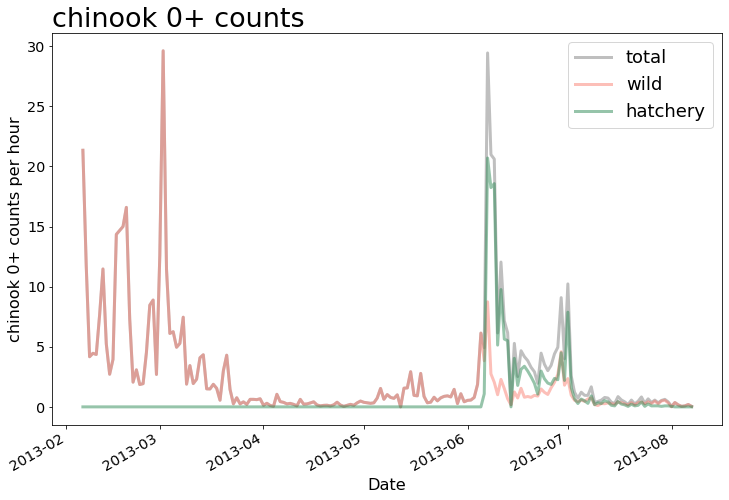

In [37]:
#chinook0
plot_fish_perhour(groupedby_dates_year,"chinook","0",["total","wild","hatchery"])

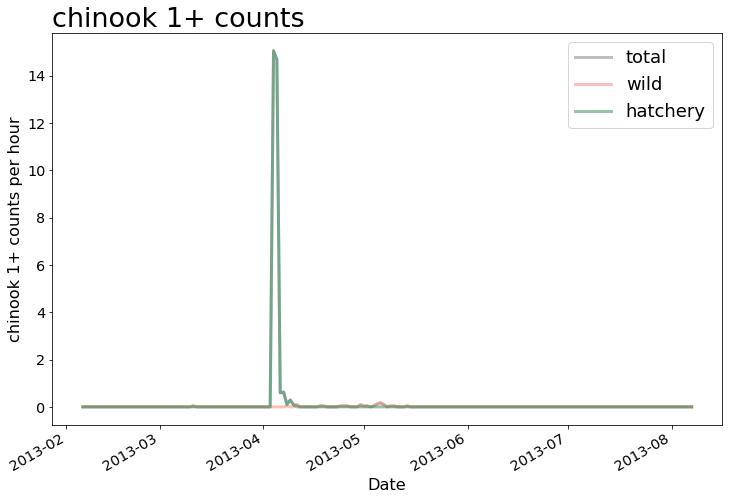

In [38]:
#chinook0
plot_fish_perhour(groupedby_dates_year,"chinook","1",["total","wild","hatchery"])

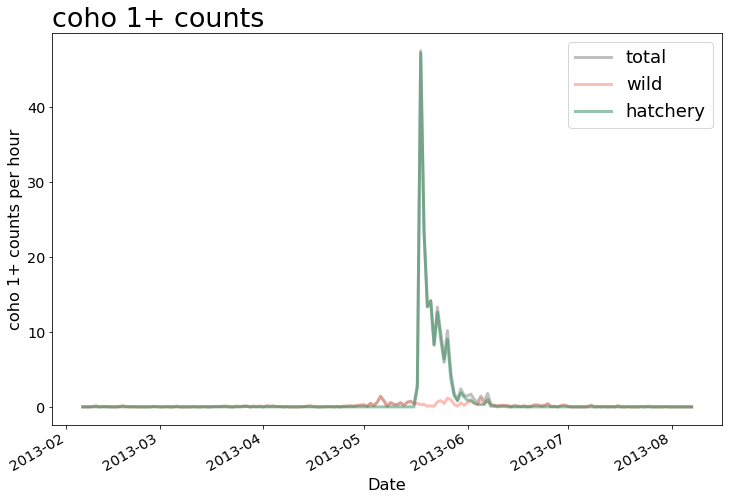

In [39]:
#coho1
plot_fish_perhour(groupedby_dates_year,"coho","1",["total","wild","hatchery"])

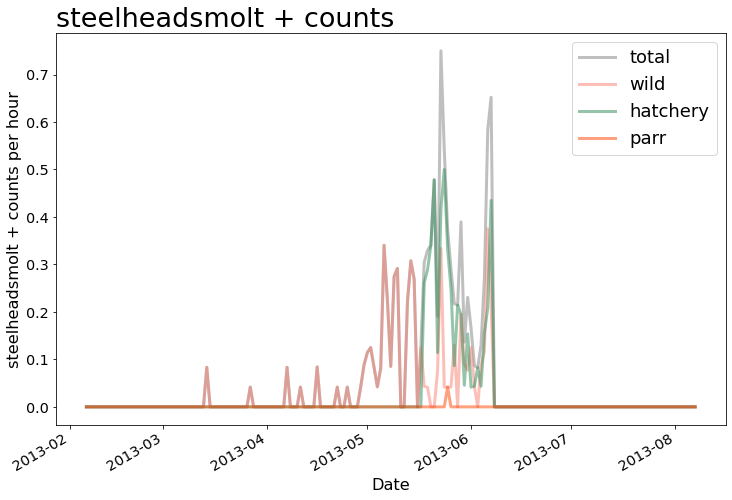

In [40]:
#steelhead
plot_fish_perhour(groupedby_dates_year,"steelheadsmolt","",["total","wild","hatchery","parr"])

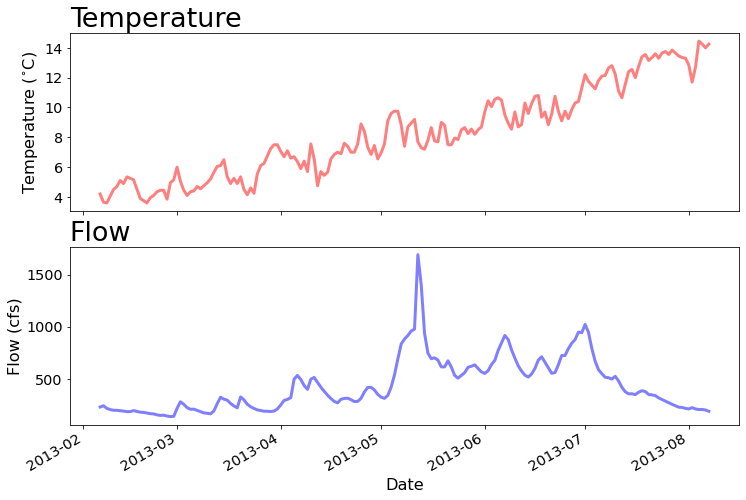

In [41]:
#plot temperature and flow
fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1.plot(
    groupedby_dates_year.index, groupedby_dates_year['temp'], color = 'red', 
    label = 'temperature', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Temperature '+ r'($^{\circ}$C)', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Temperature', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')


#flow
ax2 = fig.add_subplot(212)
ax2.plot(
    groupedby_dates_year.index, groupedby_dates_year['flow'], color = 'blue', 
    label = 'flow', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Flow (cfs)', size = 0.9*fs)
ax2.tick_params(labelsize=.8*fs)
ax2.set_title('Flow', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

In [42]:
groupedby_dates_year.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2013_dungeness.csv")  
df_year_temp_flow.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2013_dungeness_all.csv")

In [43]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Wild,Coho1_Total,Coho1_Hat,Coho1_Hat1,Coho1_Wild,Coho1_Wild1,Chum_Wild_Unmarked,Coho Fry_Wild_Unmarked,Pink_Unmark,Steelhead1_Total,Steelhead1_Hat,Steelhead1_Hat1,Steelhead1_Wild1,Steelhead1_Wild,Cutthroat_Wild_Smolt,Cutthroat_Wild_Parr,Cutthroat_Wild_Adult,Trout Parr_Wild_Total,Trout Parr_Wild_Steelhead,Dolly\Bull_Wild_Smolt,Dolly\Bull_Wild_Adult,Up,Down,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2013-02-06,16:00:00,2013-02-07,08:55:00,16.916667,0.0,361.0,0.0,0.0,361.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2013-02-07 08:55:00,2013-02-06 16:00:00,2013-02-07 00:27:30,02/07/2013,00:15,4.2,140.0,02/07/2013,00:15,231.0,2
1,2013-02-07,08:55:00,2013-02-07,17:30:00,8.583333,0.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-07 17:30:00,2013-02-07 08:55:00,2013-02-07 13:12:30,02/07/2013,13:00,4.2,140.0,02/07/2013,13:00,251.0,2
2,2013-02-07,17:30:00,2013-02-08,08:45:00,15.250000,0.0,270.0,0.0,0.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-08 08:45:00,2013-02-07 17:30:00,2013-02-08 01:07:30,02/08/2013,01:00,3.1,140.0,02/08/2013,01:00,234.0,2
3,2013-02-08,08:45:00,2013-02-08,17:35:00,8.833333,0.0,12.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-08 17:35:00,2013-02-08 08:45:00,2013-02-08 13:10:00,02/08/2013,13:00,3.6,140.0,02/08/2013,13:00,223.0,2
4,2013-02-08,17:35:00,2013-02-09,09:13:00,15.633333,0.0,90.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2013-02-09 09:13:00,2013-02-08 17:35:00,2013-02-09 01:24:00,02/09/2013,01:15,3.6,140.0,02/09/2013,01:15,212.0,2
5,2013-02-09,09:13:00,2013-02-09,17:30:00,8.283333,0.0,6.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-09 17:30:00,2013-02-09 09:13:00,2013-02-09 13:21:30,02/09/2013,13:15,4.1,140.0,02/09/2013,13:15,205.0,2
6,2013-02-09,17:30:00,2013-02-10,08:20:00,14.833333,0.0,97.0,0.0,0.0,97.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-10 08:20:00,2013-02-09 17:30:00,2013-02-10 00:55:00,02/10/2013,00:45,4.0,140.0,02/10/2013,00:45,207.0,2
7,2013-02-10,08:20:00,2013-02-10,16:45:00,8.416667,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-10 16:45:00,2013-02-10 08:20:00,2013-02-10 12:32:30,02/10/2013,12:30,4.6,140.0,02/10/2013,12:30,202.0,2
8,2013-02-10,16:45:00,2013-02-11,09:20:00,16.583333,0.0,107.0,0.0,0.0,107.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2013-02-11 09:20:00,2013-02-10 16:45:00,2013-02-11 01:02:30,02/11/2013,01:00,4.4,140.0,02/11/2013,01:00,197.0,2
9,2013-02-11,09:20:00,2013-02-11,17:15:00,7.916667,0.0,9.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-02-11 17:15:00,2013-02-11 09:20:00,2013-02-11 13:17:30,02/11/2013,13:15,4.8,140.0,02/11/2013,13:15,199.0,2


In [61]:
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(df_midpoint.index.floor('60T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                                                  'Chinook0_Hat1',
                                                  'Chinook0_Wild',
                                                  'Chinook1_Hat',
                                                  'Chinook1_Wild',
                                                  'Coho1_Wild',
                                                  'Coho1_Wild1',
                                                  'Coho1_Hat',
                                                  'Coho1_Hat1',
                                                  'Steelhead1_Hat',
                                                  'Steelhead1_Hat1',
                                                  'Steelhead1_Wild',
                                                  'Steelhead1_Wild1',
                                                  'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_all'] = (
    groupedby_time_year_subset['Chinook0_Hat']+groupedby_time_year_subset['Chinook0_Hat1'])

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat_all']/groupedby_time_year_subset['Chinook0_Hat_all'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()



groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()



groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Coho1_Hat_all'] = (
    groupedby_time_year_subset['Coho1_Hat']+groupedby_time_year_subset['Coho1_Hat1'])


groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat_all']/groupedby_time_year_subset['Coho1_Hat_all'].sum()



groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_all'] = (
    groupedby_time_year_subset['Steelhead1_Hat'] + groupedby_time_year_subset['Steelhead1_Hat1'])

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat_all']/groupedby_time_year_subset['Steelhead1_Hat_all'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Hat,Chinook1_Wild,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Coho1_Hat1,Steelhead1_Hat,Steelhead1_Hat1,Steelhead1_Wild,Steelhead1_Wild1,Trout Parr_Wild_Steelhead,Chinook0_Hat_all,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_all,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Wild_all,Coho1_Wild_prop,Coho1_Hat_all,Coho1_Hat_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_all,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,0.003484,0.229968,6.581958,0.000000,0.000000,0.000000,0.066203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233452,0.060415,0.210563,0.000000,0.000000,0.000000,0.066203,0.031909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
01:00:00,0.013684,1.196821,4.758864,0.000000,0.006316,0.027368,0.176839,0.668409,0.000000,0.026315,0.000000,0.029473,0.001053,0.000000,1.210505,0.313267,0.152241,0.000000,0.000000,0.146993,0.204207,0.098427,0.668409,0.166879,0.030526,0.102435,0.026315,0.146305,0.0
02:00:00,0.020664,1.942383,1.691320,0.040294,0.018597,0.054759,0.264495,3.174969,0.009299,0.084721,0.001033,0.076455,0.004133,0.001033,1.963047,0.508017,0.054107,0.040294,0.000764,0.432838,0.319253,0.153878,3.184268,0.795001,0.080588,0.270429,0.085754,0.476767,1.0
03:00:00,0.000000,0.237288,3.067797,0.000000,0.016949,0.016949,0.711864,0.101695,0.000000,0.067797,0.000000,0.169492,0.000000,0.000000,0.237288,0.061408,0.098142,0.000000,0.000000,0.394479,0.728814,0.351284,0.101695,0.025390,0.169492,0.568761,0.067797,0.376928,0.0
04:00:00,0.000000,0.000000,0.166667,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005332,0.833333,0.015791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
05:00:00,0.000000,0.000000,3.250000,3.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103971,3.250000,0.061586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
12:00:00,0.000000,0.010028,0.576595,0.000000,0.000000,0.005014,0.025069,0.000000,0.000000,0.000000,0.000000,0.015042,0.000000,0.000000,0.010028,0.002595,0.018446,0.000000,0.000000,0.000000,0.030083,0.014500,0.000000,0.000000,0.015042,0.050475,0.000000,0.000000,0.0
13:00:00,0.000000,0.113781,0.431367,0.000000,0.000000,0.002501,0.007502,0.011253,0.000000,0.000000,0.000000,0.001250,0.000000,0.000000,0.113781,0.029445,0.013800,0.000000,0.000000,0.000000,0.010003,0.004821,0.011253,0.002809,0.001250,0.004196,0.000000,0.000000,0.0
14:00:00,0.001104,0.094931,0.241744,0.001104,0.001104,0.004415,0.005519,0.039739,0.000000,0.000000,0.000000,0.001104,0.000000,0.000000,0.096035,0.024853,0.007734,0.001104,0.000021,0.025691,0.009935,0.004788,0.039739,0.009921,0.001104,0.003704,0.000000,0.000000,0.0
15:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [62]:
#function to plot fish count by hour
def fish_count_by_hour(species = "Chinook", year = "1"):
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    my_day = datetime.date(2014, 7, 15)
    x_dt = [ datetime.datetime.combine(my_day, t) for t in groupedby_time_year_subset.index ]
    if species == "Steelhead":
        width_bar=(x_dt[1]-x_dt[0])*0.3
        x_dt1 = [(t - (width_bar)) for t in x_dt]
        x_dt2 = [(t) for t in x_dt]
        x_dt3 = [(t + (width_bar)) for t in x_dt]

        
        plt.bar(
            x_dt1, groupedby_time_year_subset['Steelhead1_Hat_prop'], color = 'seagreen', 
            label = 'hatchery', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt2, groupedby_time_year_subset['Steelhead1_Wild_prop'], color = 'salmon', 
            label = 'wild', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt3, groupedby_time_year_subset['Steelhead1_Parr_prop'], color = 'orangered', 
            label = 'parr', alpha = 0.5, width=width_bar)
        # plt.gcf().autofmt_xdate()
        plt.xlabel('Time', size = 0.9*fs)
        plt.ylabel('Proportion of fish', size = 0.9*fs)
        ax1.tick_params(labelsize=.8*fs)

        plt.legend(fontsize=fs, loc='upper right', title = '')
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax1.set_title('Proportion of Steelhead', loc='left', fontsize = fs*1.5)
        
    else:
        
        width_bar=(x_dt[1]-x_dt[0])*0.35
        x_dt1 = [(t - (width_bar/2)) for t in x_dt]
        x_dt2 = [(t + (width_bar/2)) for t in x_dt]

        if species == "Chinook":
            if year == "0":
                y_hat = groupedby_time_year_subset['Chinook0_Hat_prop']
                y_wild = y = groupedby_time_year_subset['Chinook0_Wild_prop']
            else:
                y_hat = groupedby_time_year_subset['Chinook1_Hat_prop']
                y_wild = y = groupedby_time_year_subset['Chinook1_Wild_prop']
        else:
            y_hat = groupedby_time_year_subset['Coho1_Hat_prop']
            y_wild = y = groupedby_time_year_subset['Coho1_Wild_prop']
                
        plt.bar(
            x_dt1, y_hat, color = 'seagreen', 
            label = 'hatchery', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt2, y_wild, color = 'salmon', 
            label = 'wild', alpha = 0.5, width=width_bar)
        # plt.gcf().autofmt_xdate()
        plt.xlabel('Time', size = 0.9*fs)
        plt.ylabel('Proportion of fish', size = 0.9*fs)
        ax1.tick_params(labelsize=.8*fs)

        plt.legend(fontsize=fs, loc='upper right', title = '')
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax1.set_title('Proportion of ' + species + year +'+', loc='left', fontsize = fs*1.5)

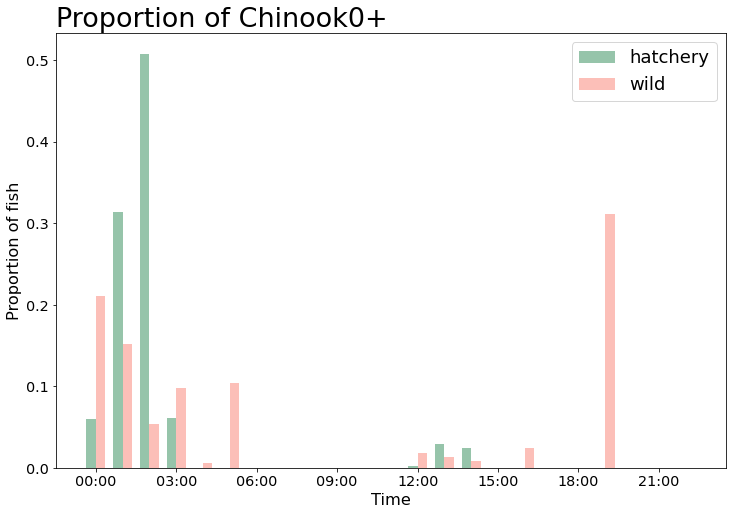

In [49]:
#chinook0
fish_count_by_hour("Chinook","0")

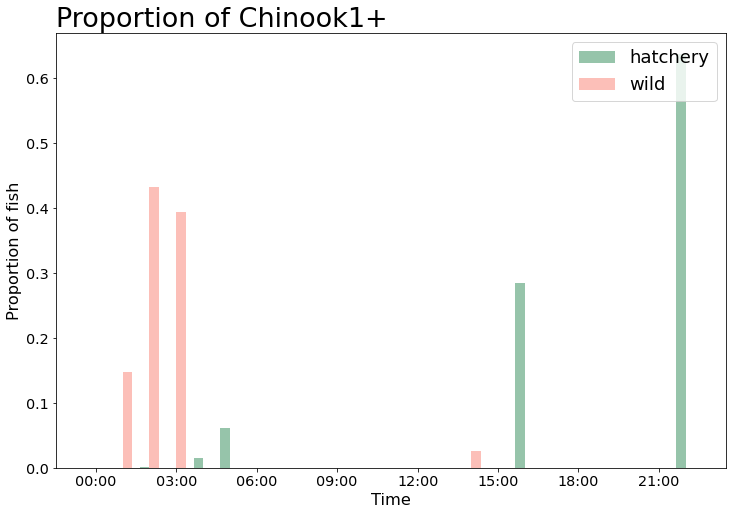

In [50]:
#chinook0
fish_count_by_hour("Chinook","1")

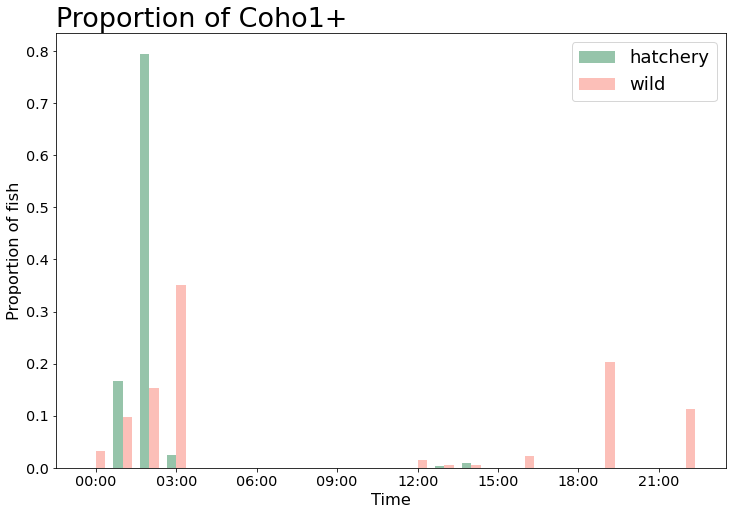

In [51]:
#coho0
fish_count_by_hour("Coho","1")

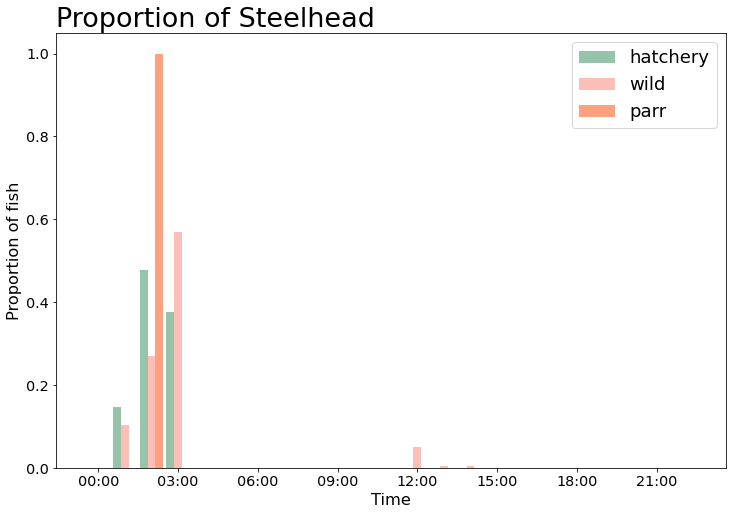

In [63]:
#steelhead
fish_count_by_hour("Steelhead","1")

In [64]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2013_dungeness_time.csv")  


In [1]:
import pandas as pd
year = "2013"
csv_name ="C:/Users/maria/OneDrive/Documents/data/pied_piper/"+str(year)+"_dungeness_all.csv"
df_year_temp_flow = pd.read_csv(csv_name, header=0) 
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(pd.to_datetime(df_midpoint.index).floor('480T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                                                  'Chinook0_Hat1',
                                                  'Chinook0_Wild',
                                                  'Chinook1_Hat',
                                                  'Chinook1_Wild',
                                                  'Coho1_Wild',
                                                  'Coho1_Wild1',
                                                  'Coho1_Hat',
                                                  'Coho1_Hat1',
                                                  'Steelhead1_Hat',
                                                  'Steelhead1_Hat1',
                                                  'Steelhead1_Wild',
                                                  'Steelhead1_Wild1',
                                                  'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_all'] = (
    groupedby_time_year_subset['Chinook0_Hat']+groupedby_time_year_subset['Chinook0_Hat1'])

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat_all']/groupedby_time_year_subset['Chinook0_Hat_all'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()



groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()



groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Coho1_Hat_all'] = (
    groupedby_time_year_subset['Coho1_Hat']+groupedby_time_year_subset['Coho1_Hat1'])


groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat_all']/groupedby_time_year_subset['Coho1_Hat_all'].sum()



groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_all'] = (
    groupedby_time_year_subset['Steelhead1_Hat'] + groupedby_time_year_subset['Steelhead1_Hat1'])

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat_all']/groupedby_time_year_subset['Steelhead1_Hat_all'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Hat,Chinook1_Wild,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Coho1_Hat1,Steelhead1_Hat,Steelhead1_Hat1,Steelhead1_Wild,Steelhead1_Wild1,Trout Parr_Wild_Steelhead,Chinook0_Hat_all,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_all,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Wild_all,Coho1_Wild_prop,Coho1_Hat_all,Coho1_Hat_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_all,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,0.014952,1.361979,3.624615,0.025067,0.010994,0.035182,0.213290,1.633320,0.003958,0.048815,0.00044,0.049255,0.002199,0.00044,1.376932,0.936599,0.695302,0.025067,0.001324,0.955019,0.248472,0.641662,1.637278,0.985967,0.051454,0.952091,0.049255,1.0,1.0
08:00:00,0.000518,0.092691,0.351605,0.000518,0.000518,0.003625,0.008285,0.023302,0.000000,0.000000,0.00000,0.002589,0.000000,0.00000,0.093209,0.063401,0.067448,0.000518,0.000027,0.044981,0.011910,0.030757,0.023302,0.014033,0.002589,0.047909,0.000000,0.0,0.0
16:00:00,0.000000,0.000000,1.236786,18.900634,0.000000,0.000000,0.126850,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.237250,18.900634,0.998648,0.000000,0.126850,0.327581,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [2]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2013_dungeness_time_daylight.csv")  
